# Ian Murphy 
# 12/10/20
# BrainStation

# PCA, Hyperparameter Optimization, and Modeling

In this notebook I will preform a Principal Component Analysis, Hyperparameter Optimization and I will run Logistic Regression, Decision Tree, and SVC models on my dataset. 

In [1]:
# importing some of the tools I need to do the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [2]:
# read in the dataframe
outcomes_df = pd.read_csv('data/outcomes_df.csv')
outcomes_df.shape

(876, 191)

### Data Dictionary

(included in previous notebook, but adding here as well for ease of use)

This cell contains a Data Dictionary containing the description for every feature the the dataframe called 'outcomes_df':

PER: This stands for Player Efficiency Rating. This is a measure of a player's per-minute productivity. It takes into account all of the positive things a player does, and creates a metric to measure how productive that player is. It is mean to summarize a player's statistical accomplishments in a single number. 

TSP: This stands for True Shooting Percentage. True shooting percentage is a measure of shooting efficiency that takes into account 2 point field goals, 3-point field goals, and free throws. 

PER and TSP will be included for the top 12 players on each team. (top 12 by minutes played per game). For example Player1_PER is the PER for the player on that team that played the most minutes per game that season. 

AVG_PER: This is the average Player Efficiency Rating of the top 12 players on each team. 

AVG_TSP: This is the average True Shooting Percentage of the top 12 players on each team. 

Coaches: I will be using dummy variables for coaches. The column titles will be the first initial, and then the last name the coach for each respective season. If the value is 1 then that means that respective coach was the coach of that team that season. If the value is 0, then that coach was not coaching that team, that season. 

ORtg: This stands for Offensive Rating. It is points scored per 100 possessions by a team. 

Rel ORtg:This is similar to ORtg, but it is relative to the league average. 

DRtg: This stands for Defensive Rating. It is the amount of points allowed per 100 posessions by a team.

Rel DRtg: This is similar to DRtg, but it is relative to the league average. 

SRS: This stands for Simple Rating System. This rating takes into account average point differential and strength of schedule. The rating is denominated in points above or below the average, where zero is average. 

Pace: The Pace factor is an estimate of the number of possessions per 48 minutes by a team. 

Rel Pace: This is similar to Pace, but it is relative to the league average. 

Playoffs: This is the target variable. 0 means the team did not make the playoffs that year. 1 Means the team did make the playoffs that year. 

### PCA

I'm conducting PCA for 2 main reasons:
1. I have 191 features. My main goal is to identify which features drive regular season success. 
2. Reducing the complexity of the data reduces the liklihood of overfitting.  

My focus in this section of the notebook will be on examining the differences between the original features and Principal Component (PC) features.

In [3]:
# lets check the dataframe 
outcomes_df.head()

,Unnamed: 0,Team,Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,...,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Division,AVG_PER,AVG_TSP,Location,Playoffs
0,0,NYK,2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,...,0,0,0,0,0,0,14.6125,0.536500,"New York, NY",0
1,1,NYK,2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,...,0,0,0,0,0,0,13.4250,0.547125,"New York, NY",0
2,2,NYK,2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,...,0,0,0,0,0,0,16.0125,0.546625,"New York, NY",0
3,3,NYK,2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,...,0,0,0,0,0,0,16.1750,0.542875,"New York, NY",0
4,4,NYK,2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,...,0,0,0,0,0,0,14.7625,0.540125,"New York, NY",0


In [4]:
# seems to be an extra column called 'Unnamed: 0', need to drop this before I get started 
outcomes_df.drop('Unnamed: 0', axis = 1, inplace = True)

I will not be using Team, Year, or Location data in my modeling because my goal is to determine what factors drive regular season success. Not whether certain teams make it more often. 

In [5]:
# dropping team, year, and location 
outcomes_df.drop(['Team', 'Year', 'Location'], axis = 1, inplace = True)

In [6]:
# checking the different datatypes, should only be int and float 
outcomes_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

Now I can begin PCA. I will set the X and y and then split the data into train and test. 

In [7]:
# Saving original features to X 
X = outcomes_df.iloc[:,:-1]

# Saving target to y 
y = outcomes_df['Playoffs']

In [8]:
# checking shape of X and y. Should be 876, 186 and 876, 1 respectively 

In [9]:
# looks good, I can move forward
print(X.shape)
print(y.shape)

(876, 186)
(876,)


In [10]:
# splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

In [11]:
# scaling the data set
# instantiate and fit to training data only
SS = StandardScaler().fit(X_train)

# Transform the data sets 
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

In [12]:
# Putting X_train into a dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)

# Check it out 
display(X_train.head())
print(X_train.shape)

,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,player10_PER,...,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Division,AVG_PER,AVG_TSP
0,-0.077248,0.064088,0.290978,-0.334864,-0.286973,-0.271492,-0.139697,0.348285,1.302058,1.070368,...,-0.039043,-0.067729,-0.055258,-0.111025,-0.103775,-0.055258,-0.067729,0.931567,-0.156974,-0.305140
1,0.531506,-0.998268,-0.609364,-1.212254,0.261466,0.335106,0.397033,-0.315429,1.120002,1.552220,...,-0.039043,-0.067729,-0.055258,9.006942,-0.103775,-0.055258,-0.067729,-0.854540,-0.661797,-0.399337
2,1.117713,0.193643,0.263695,-0.397535,-0.835413,-0.028853,0.049737,-1.516434,-0.609533,0.046434,...,-0.039043,-0.067729,-0.055258,-0.111025,-0.103775,-0.055258,-0.067729,0.931567,-0.255476,-0.205403
3,-0.618363,-0.972357,1.464152,-0.522876,-0.957288,-0.908419,0.933763,-1.168774,-0.397134,2.064187,...,-0.039043,-0.067729,-0.055258,-0.111025,-0.103775,-0.055258,-0.067729,-0.854540,-1.191246,-1.335758
4,-0.302713,-0.480046,1.546001,0.135167,1.206001,1.760611,-0.707999,-0.947537,0.361434,0.317476,...,-0.039043,-0.067729,-0.055258,-0.111025,-0.103775,-0.055258,-0.067729,-0.259171,0.914237,0.370856


(657, 186)


In the cell below I will reduce the number of features using PCA. Then I will run 2 logistic regressions, one using every feature and one using only the principal component features. 

I decided not to choose a number of principal components, but rather to set the variance of the input that is supposed to be explained. I set the parameter to 0.95. This means the PCA will select the features that explain 95% of the variance as the principal components. 

In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# instantiate and fit to scaled training data
vote_pca = PCA(n_components=0.95).fit(X_train)

# transform train and test sets 
X_train_PC = vote_pca.transform(X_train)
X_test_PC = vote_pca.transform(X_test)

In [14]:
# running logistic regression on all the original features
log_no = LogisticRegression(C=0.1) 

log_no.fit(X_train, y_train)

print(log_no.score(X_train, y_train))
print(log_no.score(X_test, y_test))

0.9512937595129376
0.8812785388127854


In [15]:
# now running the logistic regression on only the PCs 
log_pc = LogisticRegression(C=0.1) 

log_pc.fit(X_train_PC, y_train)

print(log_pc.score(X_train_PC, y_train))
print(log_pc.score(X_test_PC, y_test))

0.9406392694063926
0.8858447488584474


In [16]:
print(X_train_PC.shape)
print(X_train.shape)

(657, 148)
(657, 186)


I was able to reduce the number of features by 38 and produce almost identical results in terms of model accuracy. 

### Hyperparameter Optimization and Modeling

I am going to use the K-Fold Cross Validation method for Hyperparameter Optimization. 

GridSearchCV: I'm going to use this technique to decide search through models and hyper parameters to find the best model for my data. I already performed PCA on the data and have saved my principal components (PCs). Moving forward I will only use the PCs in my modeling. 

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# set up the (placeholder) pipeline 
pipeline = Pipeline([('scale', StandardScaler()),
                    ('model', LogisticRegression())])

# set up the parameter grid
param_grid = [
            {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[LogisticRegression()],
                'model__C': [.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000],
                'model__penalty': ['l1', 'l2']
            },
    {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[DecisionTreeClassifier()],
                'model__max_depth': [1,2,3,4,5]

    },
    {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[SVC()],
                'model__C': [0.1, 1, 10, 100],
                'model__kernel': ['linear', 'rbf']

    },
]

# instantiate the grid search
my_gridsearch = GridSearchCV(pipeline, param_grid, n_jobs=-1, verbose=1)

# fit the grid search
my_gridsearch.fit(X_train_PC, y_train)

Fitting 5 folds for each of 141 candidates, totalling 705 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 705 out of 705 | elapsed:    7.1s finished


GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(C=0.1)],
                          'model__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                       0.001, 0.1, 1, 10, 100, 1000, 10000,
                                       100000, 1000000, 10000000, 100000000,
                                       1000000000],
                          'model__penalty': ['l1', 'l2'],
                          'scale': [StandardScaler(), MinMaxScaler(), None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'scale': [StandardScaler(), MinMaxScaler(), None]},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__kernel': ['linear', 'rbf'],
             

In [18]:
my_gridsearch.best_params_

{'model': LogisticRegression(C=0.1),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'scale': None}

In [19]:
print(my_gridsearch.score(X_train_PC, y_train))
print(my_gridsearch.score(X_test_PC, y_test))

0.9406392694063926
0.8858447488584474


I want to create a bar graph of the top and bottom 10 regression coefficients. To do this I am going to run the same model as above, and then create a coefficient dictionary. I am re running the same model because I cannot pull out the stimated coefficients using a pipeline. 

In [20]:
# instantiate 
logreg = LogisticRegression(C = .1, penalty = 'l2')

# fit
logreg.fit(X_train_PC, y_train)

LogisticRegression(C=0.1)

In [21]:
logreg.score(X_train_PC, y_train)

0.9406392694063926

In [22]:
# building the dictionary of coefficients 
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],X_train):
    coef_dict[feat] = coef

In [23]:
# sorting the dictionary into a list, then changing back to a dictionary 
sorted_coef_dict = sorted(coef_dict.items(), key=lambda x: x[1], reverse = True)

# change back to dictionary 
sorted_coef_dict = dict(sorted_coef_dict)

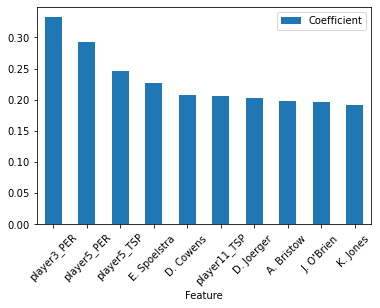

In [24]:
# now creating the bar graphs 
import matplotlib.pyplot as plt
import seaborn as sns
keys = sorted_coef_dict.keys()
values = sorted_coef_dict.values()

coef_df = pd.DataFrame({'Feature': sorted_coef_dict.keys(),
                        'Coefficient': sorted_coef_dict.values()})


coef_df.sort_values(by='Coefficient', ascending=False).head(10).set_index("Feature").plot(kind="bar", rot=45)
plt.show()
             

<Figure size 432x288 with 0 Axes>

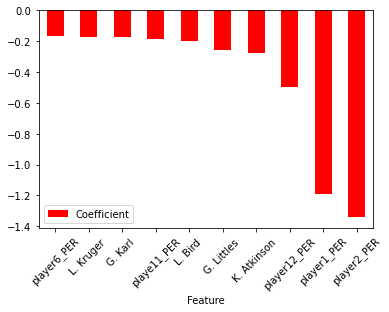

In [25]:
plt.figure()
coef_df.sort_values(by='Coefficient', ascending=False).tail(10).set_index("Feature").plot(color = 'red', kind="bar", rot=45)
plt.show()


Take Aways from the top 10 positive and negative coefficients:
- 'player1_PER' and 'Player2_PER' are the top 2 negative coefficients. This is incredibly suprising and does not make much sense to me. One would think that the players who play the most minutes would want to have a higher efficiency rating. Perhaps that teams who had their top players with very high PER caused the rest of their team to have very low PER. The top players are important, but it is still a team game and everyone needs to contribute. I am going to run more models and see if this is a trend. 
- Coaches seem very important. There are a number of coaches in both the top and bottom coefficients indicating that some coaches seem to make the playoffs very often, and some rarely make the playoffs. 
- The top 3 positive coefficients make sense. They are key statistics of players in the top 5 of their respective team. This is what I would expect. A lot of teams have 1 or 2 players that are very good. It is when you can add that 3rd player that a team really elevates. 
- If I was consulting an NBA executive, I would encourage them to hire Dave Joerger as he is an assistant coach, and most likely available for a head coaching job. There are other coached with high coefficients. If a team is looking for a new coach, this is a great way to make a short list and interview those coaches that seem to impact winning. 

I ran the a GridSearch on the PC features. What if I run the same GridSearch on all of my features? 

I want to see if there is any difference in the results or the coefficients. Since I am trying to decide what features are most important it is critical that I compare results and see if I missed anything in the model above. 

In [26]:
# set up the (placeholder) pipeline 
pipeline2 = Pipeline([('scale', StandardScaler()),
                    ('model', LogisticRegression())])

# set up the parameter grid
param_grid2 = [
            {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[LogisticRegression()],
                'model__C': [.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000],
                'model__penalty': ['l1', 'l2']
            },
    {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[DecisionTreeClassifier()],
                'model__max_depth': [1,2,3,4,5]

    },
    {
                'scale':[StandardScaler(), MinMaxScaler(), None],
                'model':[SVC()],
                'model__C': [0.1, 1, 10, 100],
                'model__kernel': ['linear', 'rbf']

    },
]

# instantiate the grid search
my_gridsearch2 = GridSearchCV(pipeline2, param_grid2, n_jobs=-1, verbose=1)

# fit the grid search
my_gridsearch2.fit(X_train, y_train)

Fitting 5 folds for each of 141 candidates, totalling 705 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 705 out of 705 | elapsed:    4.9s finished


GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(C=1)],
                          'model__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                       0.001, 0.1, 1, 10, 100, 1000, 10000,
                                       100000, 1000000, 10000000, 100000000,
                                       1000000000],
                          'model__penalty': ['l1', 'l2'],
                          'scale': [StandardScaler(), MinMaxScaler(), None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'scale': [StandardScaler(), MinMaxScaler(), None]},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__kernel': ['linear', 'rbf'],
               

In [27]:
# showing best parameters 
my_gridsearch2.best_params_

{'model': LogisticRegression(C=1),
 'model__C': 1,
 'model__penalty': 'l2',
 'scale': MinMaxScaler()}

In [28]:
print(my_gridsearch2.score(X_train, y_train))
print(my_gridsearch2.score(X_test, y_test))

0.9299847792998478
0.908675799086758


The test score is slightly higher. It went from about 89% to 91%. This means the PCA did a great job of deciding what too keep. I still want to plot the coefficients to see if there are any changes because the coefficients are going to answer my question of what features drive success.

It is also interesting to note that Logistic Regression still came out on top, but the hyper parameters were slightly different.

Im going to run a Logistic model with those parameters, then plot the coefficients on a bar graph like it did above

In [29]:
# use MinMaxScaler()
# instantiate and fit to training data only
mms = MinMaxScaler().fit(X_train)

# instantiate
logreg2 = LogisticRegression(C = 1, penalty = 'l2')

# fit 
logreg2.fit(X_train, y_train)

LogisticRegression(C=1)

In [30]:
print(logreg2.score(X_train, y_train))
print(logreg2.score(X_test, y_test))

0.9497716894977168
0.8812785388127854


In [33]:
# building the dictionary of coefficients 
coef_dict2 = {}
for coef, feat in zip(logreg2.coef_[0,:],X_train):
    coef_dict2[feat] = coef

In [34]:
# sorting the dictionary into a list, then changing back to a dictionary 
sorted_coef_dict2 = sorted(coef_dict2.items(), key=lambda x: x[1], reverse = True)

# change back to dictionary 
sorted_coef_dict2 = dict(sorted_coef_dict2)

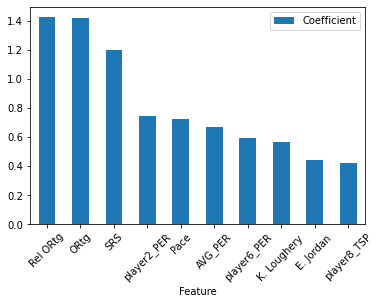

In [35]:
# now creating the bar graphs 
import matplotlib.pyplot as plt
import seaborn as sns
keys = sorted_coef_dict2.keys()
values = sorted_coef_dict2.values()

coef_df2 = pd.DataFrame({'Feature': keys,
                        'Coefficient': values})


coef_df2.sort_values(by='Coefficient', ascending=False).head(10).set_index("Feature").plot(kind="bar", rot=45)
plt.show()
             

<Figure size 432x288 with 0 Axes>

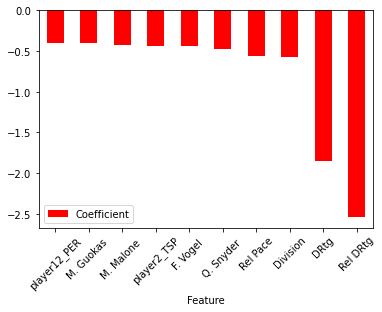

In [36]:
plt.figure()
coef_df2.sort_values(by='Coefficient', ascending=False).tail(10).set_index("Feature").plot(color = 'red', kind="bar", rot=45)
plt.show()

Take Aways:
- There are more team stats included when I used all the features. specifically the top 3 positive coefficients are ORtg, Rel ORtg, and SRS. 
- Pace is now in the top 10 coefficients. This is very interesting as there are a lot of debates on how important pace is (especially over the last 10 years). Some teams even base their whole philosophy on increasing pace and getting up and down the court as fast as possible. 
- Division is the 3 highest negative coefficient. Lets remember that the divisions were label encoded. 
- Rel Pace is also in the top 10 negative. This is confusing as it is very similar to pace. I think I am having some issues with multicolinearity which I discovered in my EDA.
- AVG_PER is one of the top 5 positive coefficients. This is no suprise and again makes a lot of sense. This is a measure of overall team performance. 


I want to look at all the coefficients and see if I can spot anything else that is interesting. 

In [38]:
sorted_coef_dict2

{'Rel ORtg': 1.4241494531382433,
 'ORtg': 1.418026074637023,
 'SRS': 1.1993029738648064,
 'player2_PER': 0.74763434726484,
 'Pace': 0.72600758428239,
 'AVG_PER': 0.6671618122038742,
 'player6_PER': 0.5936138365211667,
 'K. Loughery ': 0.5678954488091781,
 'E. Jordan ': 0.439329214952573,
 'player8_TSP': 0.42169499663084054,
 'L. Drew ': 0.4087215062783887,
 'T. Stotts ': 0.4057485082362654,
 'player3_PER': 0.4042472588094747,
 'player4_PER': 0.40142848826225747,
 'player9_PER': 0.35316989827280226,
 'T. Floyd ': 0.34894462925696923,
 'V. Del Negro ': 0.3398947500124485,
 'L. Hollins ': 0.2916301786330681,
 'K. McHale ': 0.28201975139749275,
 "J. O'Brien ": 0.279504633112203,
 'D. Versace ': 0.2765212092443033,
 'player3_TSP': 0.2753131523857132,
 'T. Lue ': 0.2649396644197391,
 'P. Jackson ': 0.2541422852710041,
 'R. Pfund ': 0.25350722303434187,
 'D. Rivers ': 0.2517737021351639,
 'D. Joerger ': 0.24148140344903202,
 'B. Fitch ': 0.2304753032740923,
 'I. Thomas ': 0.22898440409182247,

- AVG_TSP is positive, but not very high. This indicates that true shooting percentage is not as important as one might think. It also makes sense becasue there are other factors on offense that influence a teams offensive production. For example, if a team is getting offensive rebounds at a high rate, this could bring down there shooting percentage, but bring up there overall offensive production. 

### Model Evaluation

Although my ultimate goal was not to make the perfect model, but rather find out what statistics drive sucess, I still want to evaluate this model and to get an idea of how valid my finding are. 

In the cells below I will calculate precision and recall, as well as produce a confusion matrix for the last model I ran. That is the model I believe to be the best. 

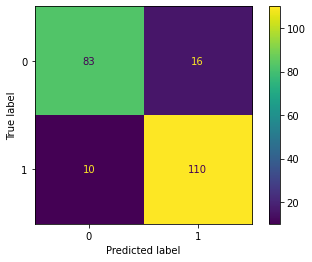

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = logreg2.predict(X_test)
plot_confusion_matrix(logreg2, X_test, y_test)

In [44]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([ 99, 120], dtype=int64))

Results: 
- Pretty good. The False positive is a little higher than I would like it to be. My model is predicting more teams to make the playoffs than actually make it. 

Next I will create a classification report to show precision and recall. 

In [45]:
from sklearn.metrics import classification_report

precision_recall_report = classification_report(y_test, y_pred)
print(precision_recall_report)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        99
           1       0.87      0.92      0.89       120

    accuracy                           0.88       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.88      0.88      0.88       219



I am very happy with the results here. The model has struck a great balance between precision and recall. 
Precision:
- 89% of the teams that I predicted would not make the playoffs did not make it
- 87% of the teams that I predicted would make the playpoffs made it. 
Recall: 
- The model captured 84% of all the teams that didnt make the playoffs. 
- The model captured 92% of all the teams that did make the playoffs. 

The model put more teams in the playoffs than it should have, but over all the results are very good. F1 scores close to 90%, I think this model did great with the data provided. 

 ### Conclusion
 
 I feel that because my data set is not too large, the best model is the one that includes all of the features. The coefficients make more sense and give back some actionable insights. Here are my key recomendations to NBA executives. 
 
 1. Coaches matter. Across all modeling coaches were a huge factor. We can use this data to make a short list of coaches that have the biggest impact on winning and then target those coaches. 
 2. Offense Rules. ORtg and Rel ORtg are the top 2 positive coefficients in the best model. This furthers the notion that it is an offensive league and teams cannot rely on strong defense to win. in order to be sucessful, offense should be the number one priority. Instead of going after players who are defensive minded, focus on those players that have a history of being pruductive on offense.
 3. The top 3 players are incredibly important and they must have a high PER. player3_PER didnt make the top 10 positive coefficients, but it was number 13. This tells us that the third player is incredibly important. A lot of teams have 1 or 2 great players. Adding that third player is a major key to success.
 4. Pace: It is important, but do not let it rule your philosophy. I got mixed results in determining if this was a big factor. I suspect that depending on the make up of your team, this could have a positive or negative impact. My recomendation is to hire a coach with a good track record, and let him decide how much emphasis to put on pace. 